In [ ]:
# 단축키 정리
# 실행 shitf + enter, ctrl + enter
# 아래 셀 추가 ctrl+ m +b
# 위 셀 추가 ctrl + m + a
# 셀 삭제 ctrl + m + d
# 마크다운 ctrl + m + m
# 되돌리기 ctrl + m + t 

In [ ]:
# 딥러닝 프레임워크 확인
# 텐서플로우
import tensorflow as tf
print(tf.__version__) # 언더바두개(던더)

2.8.2


In [ ]:
# 데이터 사용 -> 경로복사해서 이용해보자 (나의 드라이브)

In [ ]:
! pwd

/content


### 목표
- 학생 수학 성적 예측하는 모델을 만들어보자
- keras를 통해서 신경망을 구성하는 방법을 연습해보자

In [ ]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 불러오기
- 구분자 (delimiter): ";"

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/student-mat.csv', delimiter = ';')
data

In [ ]:
# G3 : 답데이터

In [ ]:
# 데이터 정보확인
data.info()

#### 문제와 답으로 분리
- 특성1개 : studytime
- 답 : G3

In [ ]:
# 컬럼명
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
# X 문제 
# y 답
X = data['studytime']
y = data['G3']
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
# train, test분할
# 2차원  sklearn -> train_test_split()
# 7:3
# 랜덤고정값 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
# 크기확인
print("훈련용문제",X_train.shape)
print("훈련용답",y_train.shape)
print("테스트용문제",X_test.shape)
print("테스트용답",y_test.shape)

훈련용문제 (276,)
훈련용답 (276,)
테스트용문제 (119,)
테스트용답 (119,)


#### 신경망 모델 생성
1. 신경망 구조 설계
2. 신경망 학습/평가 방법 설정
3. 학습
4. 모델 평가 및 예측

In [ ]:
# 1. 신경망 구조 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation
# Sequential : 신경망의 뼈대를 구축하기 위한 함수
# Dense : 신경망 층을 구성하는 함수
# Activation : 활성화 함수를 설정하는 함수

In [ ]:
# 신경망 뻐대 생성
model = Sequential()

# 층 설정(입력층, 중간층(은닉층), 출력층)
# units : 뉴런의 개수 설정
# input_dim : 입력 데이터의 특성 개수 설정(지금은 특성 1개)
# 활성화 함수 연결
# 지금 입력층 + 중간층=>1
model.add(Dense(units= 4, input_dim= 1))   # 퍼셉트론 4개 (1-4-1 병렬적 다층구조)
model.add(Activation('sigmoid'))
# 출력층 : 회귀 
# 회기의 경우 출력층의 유닛(units)의 개수는 항상1개
model.add(Dense(units=1)) # 회귀예측시 활성화 함수는 기본 linear 사용 : 항등함수
# model.add(Activation('linear')) 그래서 이줄은 생략가능

# 모델 정보 요약 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 8         
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 신경망 학습/평가 방법 설정 - compile
# loss 손실함수(오차계산), optimizer최적화함수(경사하강)
model.compile(loss='mse', 
              optimizer='sgd') # 경사하강법(sgd : 확률적 경사하강법)

In [ ]:
# 3. 모델 학습
h = model.fit(X_train,y_train,epochs=100)

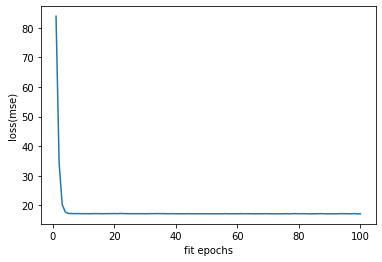

In [ ]:
# 학습 현황 시각화
# 선그래프
# mse 시각화 - loss 접근
plt.plot(range(1,101), 
         h.history['loss']) #100
plt.xlabel('fit epochs')
plt.ylabel('loss(mse)')
plt.show()

In [ ]:
# 4. 모델 평가 및 예측
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 29.7228


29.722787857055664

In [ ]:
# 모델 예측
# predict
model.predict(X_test)

array([[11.4411335],
       [11.4411335],
       [11.4411335],
       [10.797213 ],
       [10.797213 ],
       [11.4411335],
       [10.797213 ],
       [10.797213 ],
       [ 9.690306 ],
       [11.4411335],
       [11.4411335],
       [10.797213 ],
       [11.805569 ],
       [11.805569 ],
       [10.797213 ],
       [ 9.690306 ],
       [ 9.690306 ],
       [11.4411335],
       [10.797213 ],
       [10.797213 ],
       [10.797213 ],
       [ 9.690306 ],
       [11.4411335],
       [10.797213 ],
       [11.805569 ],
       [11.4411335],
       [10.797213 ],
       [ 9.690306 ],
       [11.4411335],
       [ 9.690306 ],
       [ 9.690306 ],
       [ 9.690306 ],
       [11.805569 ],
       [10.797213 ],
       [10.797213 ],
       [10.797213 ],
       [ 9.690306 ],
       [10.797213 ],
       [ 9.690306 ],
       [10.797213 ],
       [10.797213 ],
       [11.805569 ],
       [10.797213 ],
       [ 9.690306 ],
       [11.805569 ],
       [ 9.690306 ],
       [10.797213 ],
       [ 9.69